In [ ]:
#Work
#請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
'''
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    return model
'''
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)  #Input()用于实例化Keras张量.  shape值(2,)，意思是一维数组，数组中有2个元素
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)  #全连接层 units: 正整数，输出空间维度 activation: 激活函数
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x) ##Dense就是常用的全连接层，所实现的运算是output = activation(dot(input, kernel)+bias)。其中activation是逐元素计算的激活函数，kernel`是本层的权值矩阵，bias为偏置向量，只有当use_bias=True才会添加。
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""

## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.85

In [15]:
'''
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
'''
results = {} #results 只是自己定義的一個變數的名稱
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr)) #%.6f 输出小数,即保留小数点后6位
    model = build_mlp(input_shape=x_train.shape[1:]) ##多层感知机（MLP） #reshape（行，列）可以根据指定的数值将数据转换为特定的行数和列数，这个好理解，就是转换成矩阵。
    model.summary() #模型摘要
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM) #優化器 lr=LEARNING_RAT 學習率 lr 是線性迴歸的意思 nesterov：布爾值。 是否適用Nesterov勢頭
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results ＃收集結果
    train_loss = model.history.history["loss"] #一个 History 对象。其 History.history 属性是连续 epoch 训练损失和评估值，以及验证集损失和评估值的记录（如果适用）
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    '''
    acc: 模型在训练集上准确率
    loss: 模型在训练集上的代价函数值
    val_acc: 模型在验证集上准确率
    val_loss: 模型在验证集上的代价函数值
    '''
    
    exp_name_tag = "exp-lr-%s" % str(lr) #輸出的標簽名稱
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.8724 - acc: 0.3309 - val_loss: 1.7763 - val_acc: 0.3610
Epoch 2/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.6767 - acc: 0.4046 - val_loss: 1.6676 - val_acc: 0.4032
Epoch 3/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.5852 - acc: 0.4379 - val_loss: 1.5610 - val_acc: 0.4435
Epoch 4/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.5291 - acc: 0.4581 - val_loss: 1.5530 - val_acc: 0.4426
Epoch 5/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.4751 - acc: 0.4769 - val_loss: 1.4818 - val_acc: 0.4717
Epoch 6/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.4359 - acc: 0.4888 - val_loss: 1.5040 - val_acc: 0.4650
Epoch 7/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.3964 - acc: 0.5049 - val_loss: 1.

50000/50000 [==============================] - 11s 216us/step - loss: 2.1252 - acc: 0.2213 - val_loss: 1.9952 - val_acc: 0.2857
Epoch 2/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.9381 - acc: 0.3126 - val_loss: 1.8924 - val_acc: 0.3383
Epoch 3/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.8616 - acc: 0.3468 - val_loss: 1.8387 - val_acc: 0.3543
Epoch 4/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.8119 - acc: 0.3655 - val_loss: 1.7945 - val_acc: 0.3700
Epoch 5/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.7740 - acc: 0.3808 - val_loss: 1.7581 - val_acc: 0.3826
Epoch 6/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.7431 - acc: 0.3915 - val_loss: 1.7334 - val_acc: 0.3920
Epoch 7/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.7166 - acc: 0.4008 - val_loss: 1.7108 - val_acc: 0.4009
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.2433 - acc: 0.1709 - val_loss: 2.2182 - val_acc: 0.1927
Epoch 3/50
50000/50000 [==============================] - 10s 203us/step - loss: 2.1978 - acc: 0.2004 - val_loss: 2.1774 - val_acc: 0.2211
Epoch 4/50
50000/50000 [==============================] - 10s 207us/step - loss: 2.1596 - acc: 0.2251 - val_loss: 2.1417 - val_acc: 0.2341
Epoch 5/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.1263 - acc: 0.2439 - val_loss: 2.1103 - val_acc: 0.2548
Epoch 6/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.0969 - acc: 0.2580 - val_loss: 2.0830 - val_acc: 0.2683
Epoch 7/50
50000/50000 [==============================] - 10s 206us/step - loss: 2.0706 - acc: 0.2721 - val_loss: 2.0573 - val_acc: 0.2769
Epoch 8/50
50000/50000 [==============================] - 10s 207us/step - loss: 2.0469 - acc: 0.2804 - val_loss: 2.0348 - val_acc: 0.2868
Epoch 9/50
50000/50000 [===

50000/50000 [==============================] - 10s 208us/step - loss: 2.3139 - acc: 0.1104 - val_loss: 2.3066 - val_acc: 0.1101
Epoch 3/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.3004 - acc: 0.1175 - val_loss: 2.2948 - val_acc: 0.1178
Epoch 4/50
50000/50000 [==============================] - 10s 203us/step - loss: 2.2896 - acc: 0.1242 - val_loss: 2.2849 - val_acc: 0.1243
Epoch 5/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.2802 - acc: 0.1301 - val_loss: 2.2761 - val_acc: 0.1288
Epoch 6/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.2717 - acc: 0.1371 - val_loss: 2.2680 - val_acc: 0.1364
Epoch 7/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.2639 - acc: 0.1431 - val_loss: 2.2605 - val_acc: 0.1417
Epoch 8/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.2565 - acc: 0.1497 - val_loss: 2.2534 - val_acc: 0.1475
Epoch 9/50
50000/50000 [==============

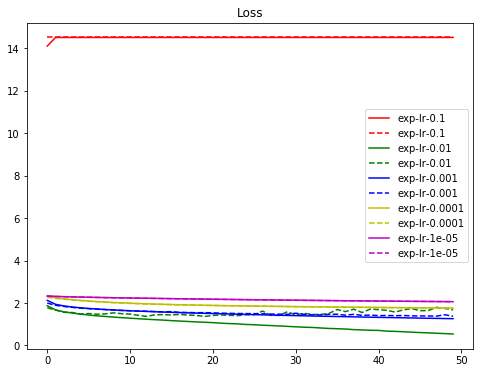

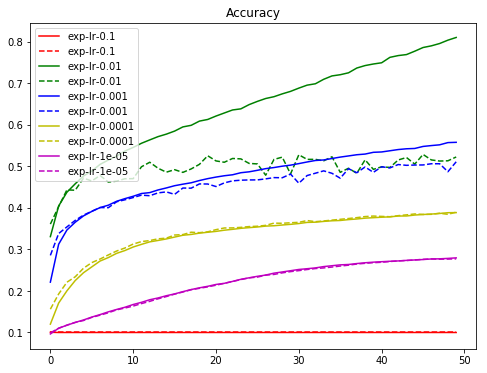

In [16]:
'''
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
'''
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()